# Decision Tree

In addition to the model using logistic regression to predict the outcome of an animal, we also wanted to gain some further insight into which features of the animals influence the outcome.
For this purpose we decided to use a decision tree because it offers a very nice way to visualize how the animals are classifed and the results can be interpreted easily.
When training the decision tree we used cross validation to tune many of the possible hyperparameters (see the section on training), however for some of the hyperparamters, e.g. the minimal number of animals per leaf, we used the deafult parameters because they already give sensible results.
The maximal depth of the tree was set to 5 because this prevents the model from becoming too convolved and it makes sure that the results generalize well.

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, svm, preprocessing, metrics, ensemble, tree
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## load  and prepare data

In [3]:
#read in the data with numerical features
data = pd.read_csv('data/transformed_data_num.csv',index_col=0)
data.dropna(inplace=True)

In [4]:
data.head(10)

,outcometype,animaltype,sex,age,year,neutralized,colormix,breedmix,apricot,black,black.1,black brindle,black smoke,black tabby,blue,blue cream,blue merle,blue point,blue smoke,blue tabby,blue tick,blue tiger,brown,brown brindle,brown merle,brown tabby,buff,calico,calico point,chocolate,chocolate point,cream,cream tabby,fawn,flame point,gold,gray,gray tabby,lilac point,liver,lynx point,orange,orange tabby,red,red merle,red tick,sable,seal point,silver,silver tabby,tan,torbie,tortie,tortie point,tricolor,white,yellow,yellow brindle,affenpinscher,airedale terrier,akita,alaskan husky,alaskan malamute,american bulldog,american eskimo,american pit bull terrier,american shorthair,american staffordshire terrier,anatol shepherd,angora,australian cattle dog,australian kelpie,australian shepherd,basenji,basset hound,beagle,beauceron,belgian malinois,bernard rough coat,bernard smooth coat,bernese mountain dog,bichon frise,black.2,black.3,black mouth cur,bloodhound,blue lacy,bluetick hound,border collie,border terrier,boston terrier,boxer,brittany,bruss griffon,bull terrier,bulldog,bullmastiff,cairn terrier,cane corso,cardigan welsh corgi,carolina dog,catahoula,cavalier span,chesa bay retr,chihuahua longhair,chihuahua shorthair,chinese sharpei,chow chow,cocker spaniel,collie rough,collie smooth,dachshund,dachshund longhair,dachshund wirehair,dalmatian,doberman pinsch,dogo argentino,domestic longhair,domestic medium hair,domestic shorthair,dutch shepherd,english bulldog,english coonhound,english pointer,english springer spaniel,feist,finnish spitz,flat coat retriever,french bulldog,german shepherd,german shorthair pointer,golden retriever,great dane,great pyrenees,greyhound,harrier,havanese,himalayan,irish wolfhound,italian greyhound,jack russell terrier,japanese bobtail,labrador retriever,landseer,leonberger,lhasa apso,maine coon,maltese,manchester terrier,manx,mastiff,miniature pinscher,miniature poodle,miniature schnauzer,newfoundland,norfolk terrier,norwich terrier,papillon,parson russell terrier,patterdale terr,pbgv,pekingese,pembroke welsh corgi,persian,pharaoh hound,pit bull,plott hound,pointer,pomeranian,pug,queensland heeler,ragdoll,rat terrier,redbone hound,rhod ridgeback,rottweiler,russian blue,schipperke,shetland sheepdog,shiba inu,shih tzu,siamese,siberian husky,silky terrier,smooth fox terrier,snowshoe,soft coated wheaten terrier,st,staffordshire,standard poodle,standard schnauzer,swedish vallhund,tibetan terrier,toy fox terrier,toy poodle,treeing walker coonhound,vizsla,weimaraner,west highland,whippet,wire hair fox terrier,yorkshire terrier,april,august,december,february,january,july,june,march,may,november,october,september,friday,monday,saturday,sunday,thursday,tuesday,wednesday
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Return_to_owner,1.0,0.0,0.090683,0.333333,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Euthanasia,0.0,1.0,0.090683,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
#prepare data
X = np.array(data.drop('outcometype',axis=1))
Y = np.array(data.outcometype)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size=0.7)

## train the model

In [6]:
#search a good model
tr = tree.DecisionTreeClassifier()

param_dict = {'max_depth':[5], 'criterion':["gini", "entropy"], 'max_features':['auto', None], 
              'splitter':['best', 'random']}

clf = model_selection.GridSearchCV(tr, param_grid = param_dict, n_jobs = -1)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.63072648869208
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131256,0.002923,0.013005,0.001163,gini,5,auto,best,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.435535,0.521488,0.436112,0.476781,0.476919,0.469367,0.031872,8
1,0.134608,0.013446,0.014752,0.004741,gini,5,auto,random,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.592155,0.487453,0.430343,0.474474,0.456434,0.488172,0.055411,5
2,0.647734,0.016900,0.016040,0.001055,gini,5,None,best,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.629651,0.620998,0.627632,0.631670,0.643681,0.630726,0.007404,1
3,0.566607,0.045711,0.014473,0.002187,gini,5,None,random,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.618114,0.631093,0.635420,0.627632,0.635026,0.629457,0.006344,2
4,0.119388,0.006833,0.011889,0.001684,entropy,5,auto,best,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.478800,0.439573,0.589559,0.493799,0.435661,0.487478,0.055706,6
5,0.124213,0.005114,0.014494,0.005258,entropy,5,auto,random,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.460917,0.432651,0.444765,0.441015,0.607905,0.477451,0.065871,7
6,0.635322,0.021418,0.013364,0.001596,entropy,5,None,best,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.614076,0.629651,0.626190,0.629363,0.641085,0.628073,0.008636,4
7,0.463454,0.119418,0.008984,0.002154,entropy,5,None,random,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.614941,0.636285,0.633401,0.627344,0.633006,0.628995,0.007601,3


## results

In the confusion matrices below one can see that the model makes some mispredictions, especially regarding the rare labels 'died' and 'euthanasia', but it also has a hard time with differentiating 'adoption' from 'transfer' and 'return'.
The overall accuracy scores on the training and testing data however are not bad and since they are very similar this means that the results generalize very well.
The plot of the decision tree (its best to view the pdf file) gives some hints as to what influences the outcome of the individual animals.

In [7]:
#training score
clf.score(x_train,y_train)

0.638975424022153

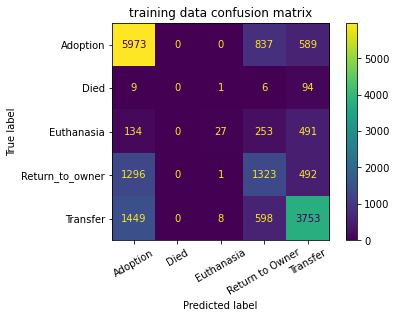

In [8]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train,ax=ax)
ax.set_title('training data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()

In [9]:
#testing score
clf.score(x_test,y_test)

0.6397039030955586

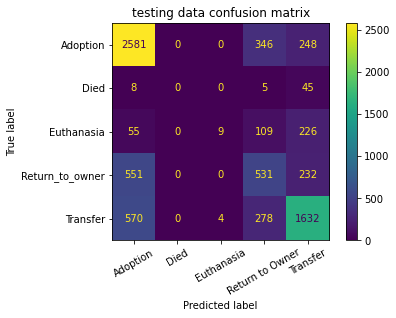

In [10]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,ax=ax)
ax.set_title('testing data confusion matrix')
ax.set_xticklabels(labels=['Adoption','Died','Euthanasia','Return to Owner','Transfer'],rotation=30)
plt.show()

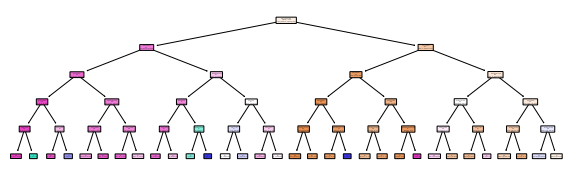

In [11]:
#plot the tree
fig = plt.figure(figsize=(10,3))
tree.plot_tree(clf.best_estimator_,feature_names=data.columns[1:] ,rounded=True, filled =True, 
               impurity=False, label='root', class_names=['Adoption', 'Died', 'Euthanasia', 'Return', 'Transfer'])
plt.show()
fig.savefig('tree.pdf')